In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\archive (10)\train.csv")
mealinfo_df = pd.read_csv(r"C:\Users\lenovo\Downloads\archive (10)\meal_info.csv")
fulfillment_df = pd.read_csv(r"C:\Users\lenovo\Downloads\archive (10)\fulfilment_center_info.csv")

In [3]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
mealinfo_df.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
fulfillment_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
df_merged = df.merge(fulfillment_df, on = "center_id", how="left")
df_merged = df_merged.merge(mealinfo_df, on = "meal_id", how = "left")

In [7]:
df_merged.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [8]:
# Aggregate order data on a weekly basis
weekly_orders = df_merged.groupby("week")["num_orders"].sum()

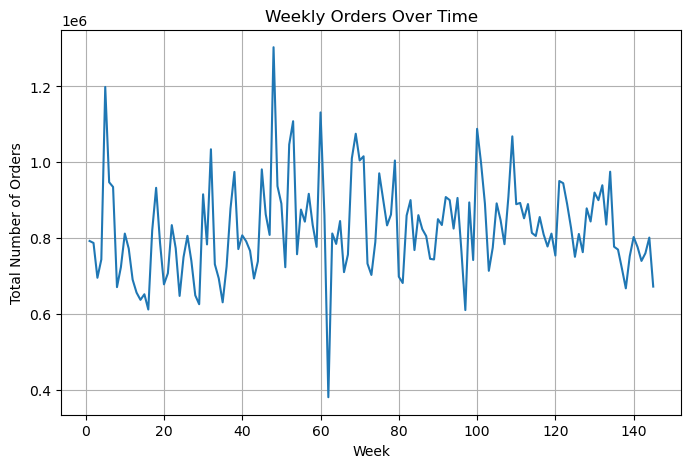

In [9]:
plt.figure(figsize = (8,5))
sns.lineplot(x= weekly_orders.index, y = weekly_orders.values)
plt.title("Weekly Orders Over Time")
plt.xlabel("Week")
plt.ylabel("Total Number of Orders")
plt.grid(True)
plt.show()

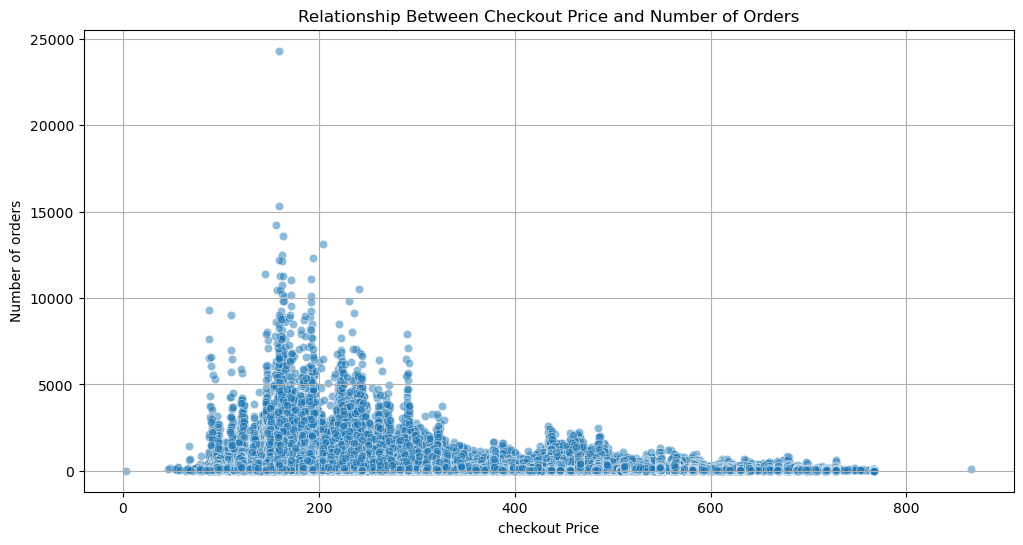

In [10]:
# Creating a sactter plot to analyze the relationship between checkout price and Number of Orders
plt.figure(figsize=(12,6))
sns.scatterplot(x = "checkout_price", y = "num_orders", data = df_merged, alpha = 0.5)
plt.title("Relationship Between Checkout Price and Number of Orders")
plt.xlabel("checkout Price")
plt.ylabel("Number of orders")
plt.grid(True)
plt.show()

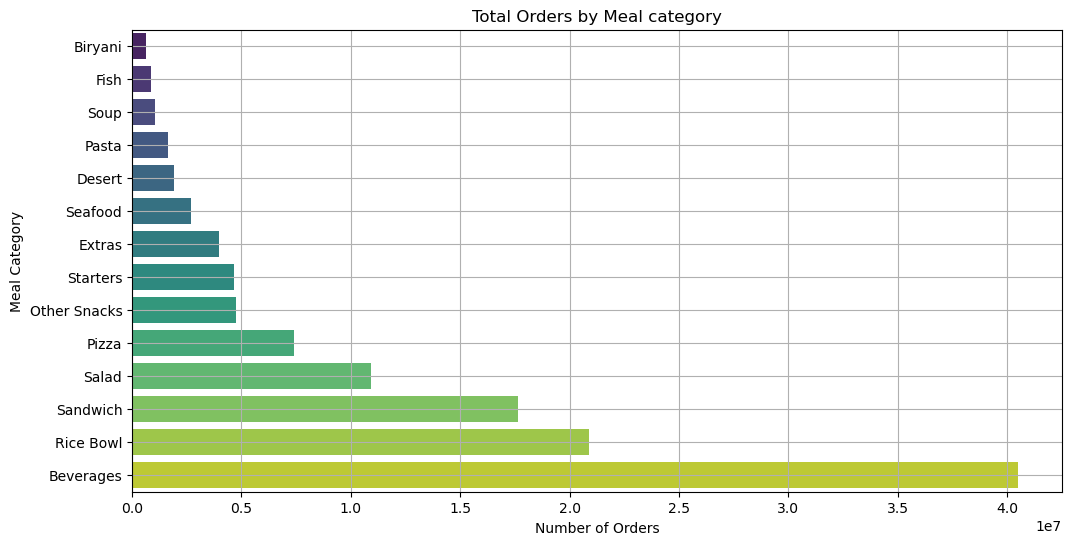

In [11]:
# Grouping data by meal category to find the popularity of categoris
category_orders = df_merged.groupby("category")["num_orders"].sum().sort_values(ascending=True)

# ploting the bar chart for meal categories
plt.figure(figsize=(12,6))
sns.barplot(x = category_orders.values, y = category_orders.index, palette = "viridis")
plt.title("Total Orders by Meal category")
plt.xlabel("Number of Orders")
plt.ylabel("Meal Category")
plt.grid(True)
plt.show()

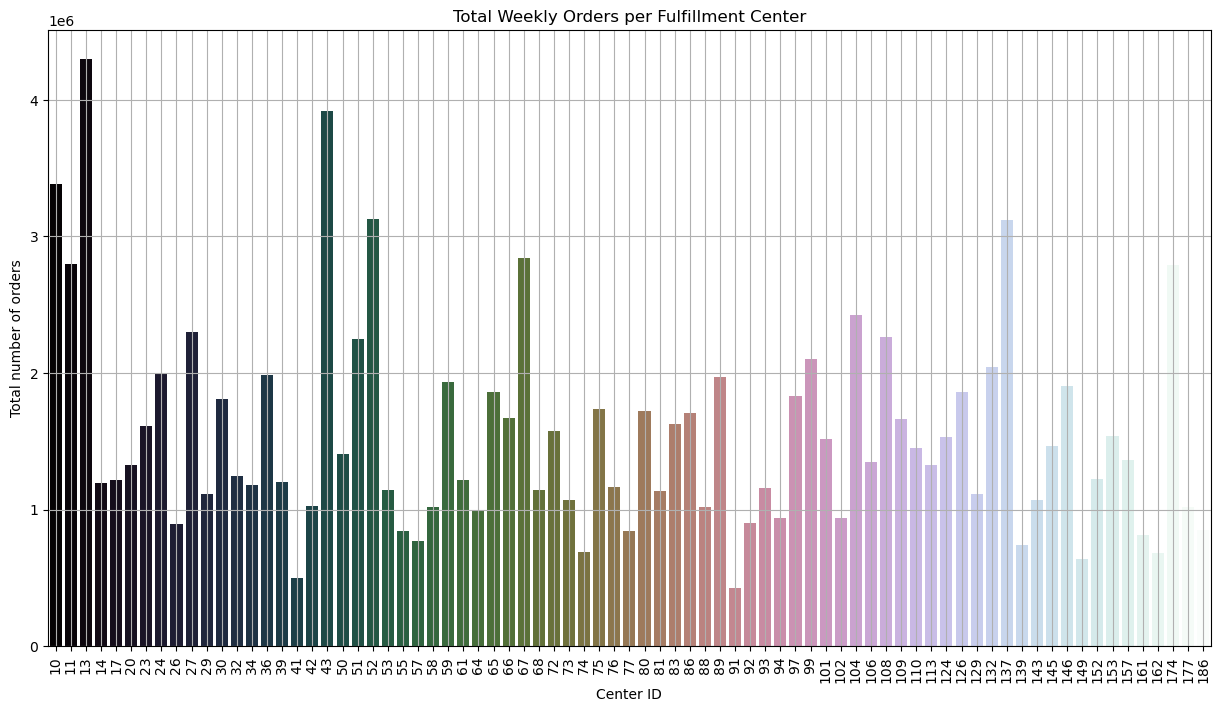

In [12]:
# Grouping data by center and aggregating the total weekly orders for each center
center_weekly_orders = df_merged.groupby("center_id")["num_orders"].sum().sort_values(ascending = False)
# Plotting the bar chart for weekly orders per center 
plt.figure(figsize=(15,8))
sns.barplot(x = center_weekly_orders.index, y = center_weekly_orders.values, palette="cubehelix")
plt.title("Total Weekly Orders per Fulfillment Center")
plt.xlabel("Center ID")
plt.ylabel("Total number of orders")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

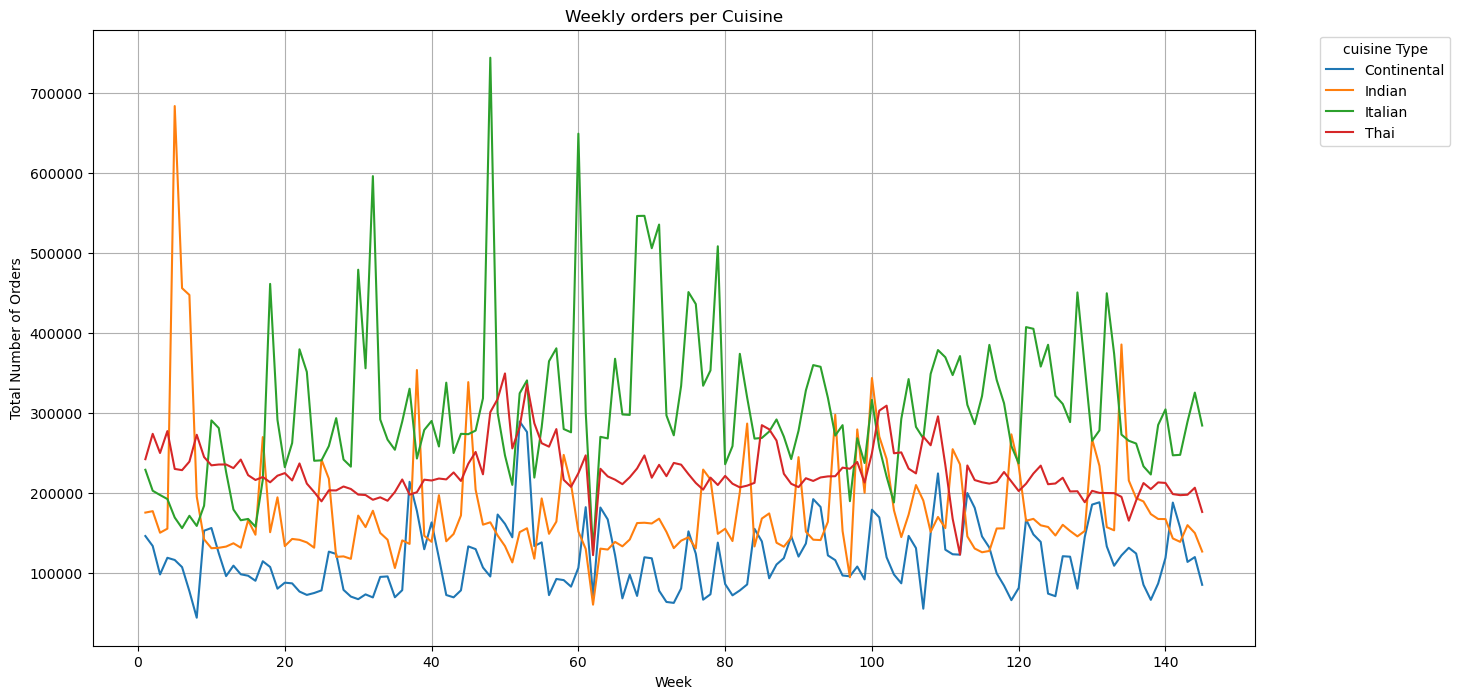

In [13]:
# Aggregate order data by cuisine and week 
cuisine_weekly_orders = df_merged.groupby(["cuisine", "week"])["num_orders"].sum().reset_index()

# pivote the data for easir visualization 
cuisine_weekly_orders_pivot = cuisine_weekly_orders.pivot(index = "week", columns = "cuisine", values = "num_orders")

# ploting the weekly orders per cuisine
plt.figure(figsize=(15,8))
sns.lineplot(data=cuisine_weekly_orders_pivot, dashes = False)
plt.title("Weekly orders per Cuisine")
plt.xlabel("Week")
plt.ylabel("Total Number of Orders")
plt.legend(title = "cuisine Type", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.grid(True)
plt.show()

In [14]:
# Identifying the cuisine with the highest average number of orders 
# Grouping data by week and cuisine, and summing the number of orders
weekly_orders = df_merged.groupby(["week", "cuisine"])["num_orders"].sum().reset_index()

# Finding the cuisine with the highest average orders
highest_orders_cuisine = weekly_orders.groupby("cuisine")["num_orders"].mean().idxmax()

# Extracting data for the cuisine with the highest average orders
highest_orders_data = weekly_orders[weekly_orders["cuisine"] == highest_orders_cuisine]

highest_orders_cuisine, highest_orders_data.describe()


('Italian',
              week     num_orders
 count  145.000000     145.000000
 mean    73.000000  304640.220690
 std     42.001984   95519.490576
 min      1.000000  126739.000000
 25%     37.000000  249788.000000
 50%     73.000000  284872.000000
 75%    109.000000  342209.000000
 max    145.000000  743949.000000)

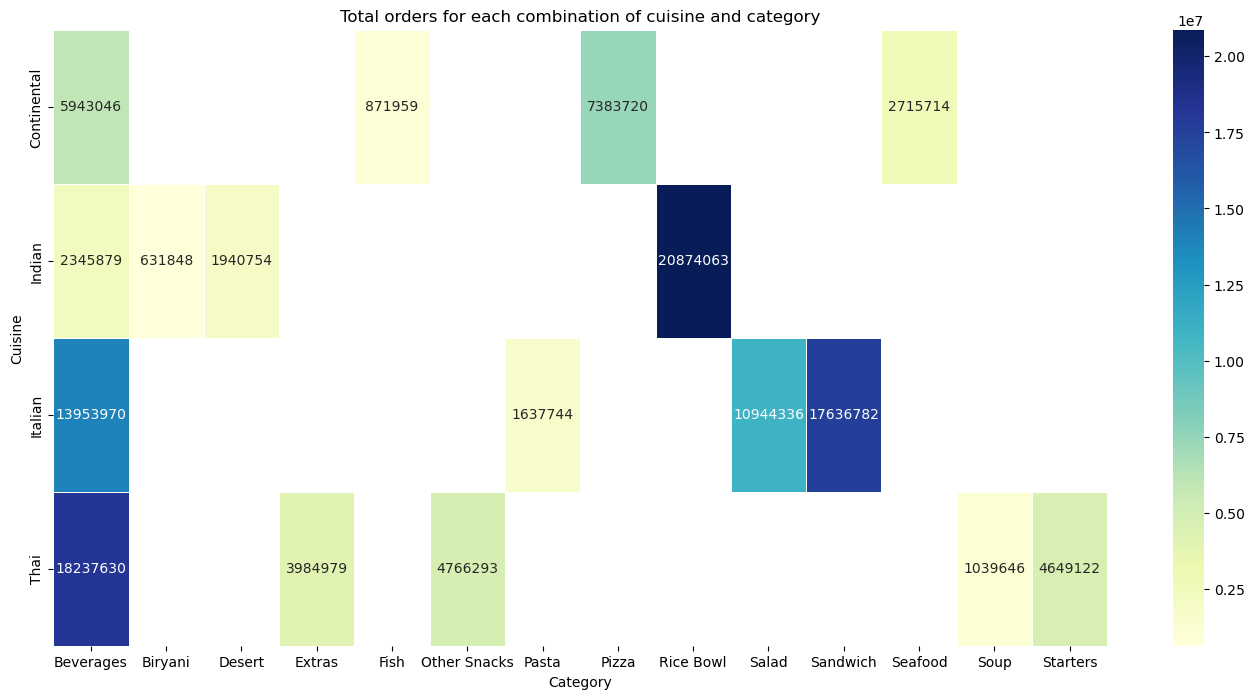

In [15]:
# grouping data by cuisine and category, then summing the number of orders
cuisine_weekly_orders = df_merged.groupby(["cuisine", "category"])["num_orders"].sum().unstack()

# creating a heatmap to show total orders for each combination of cuisine and category 
plt.figure(figsize=(17,8))
sns.heatmap(cuisine_weekly_orders, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title("Total orders for each combination of cuisine and category")
plt.xlabel("Category")
plt.ylabel("Cuisine")
plt.show()


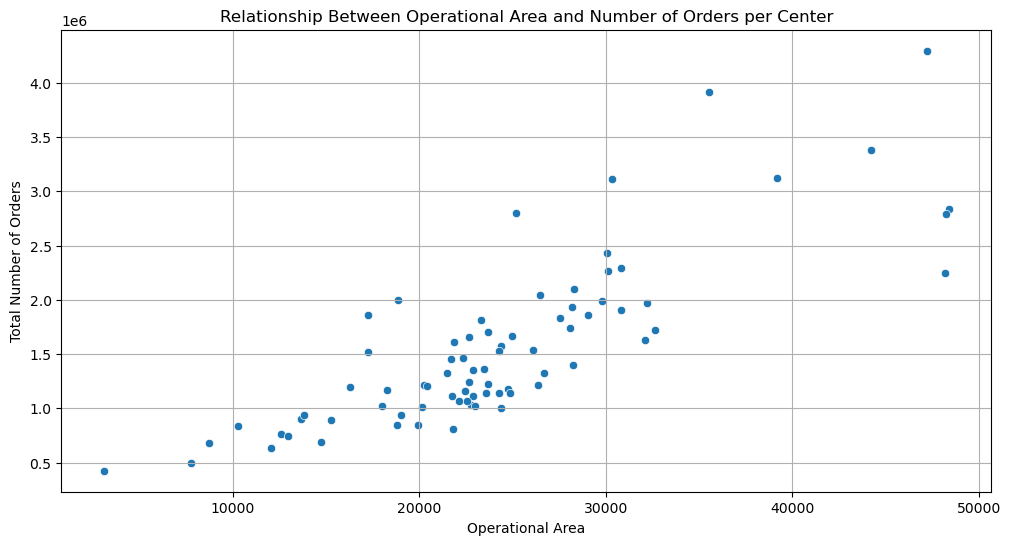

In [16]:
# Assuming you want to create center_orders_op_area from df_merged
center_orders_op_area = df_merged.groupby("center_id")[["op_area", "num_orders"]].sum().reset_index()

# Plotting the relationship between operational area and the number of orders for each center
plt.figure(figsize=(12, 6))
sns.scatterplot(x="op_area", y="num_orders", data=center_orders_op_area)
plt.title("Relationship Between Operational Area and Number of Orders per Center")
plt.xlabel("Operational Area")
plt.ylabel("Total Number of Orders")
plt.grid(True)
plt.show()


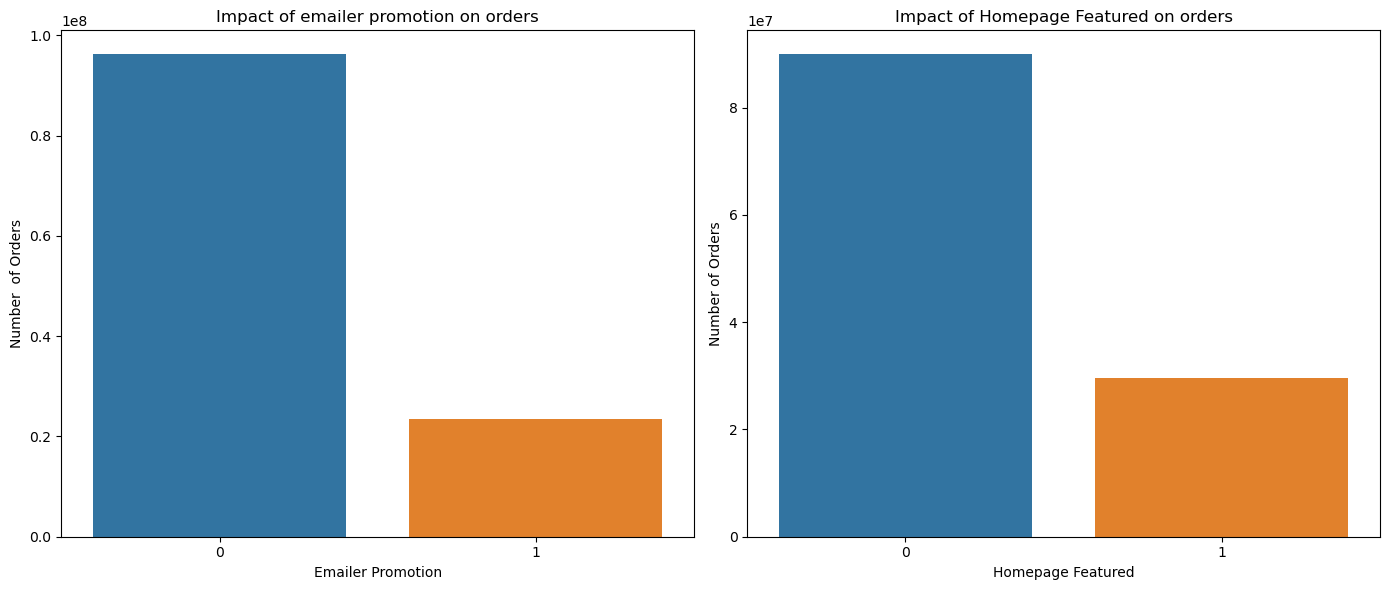

In [17]:
# aggregating data to get total orders with and without emailer promotions and homopage features 
emailer_orders = df_merged.groupby("emailer_for_promotion")["num_orders"].sum()
homepage_orders = df_merged.groupby("homepage_featured")["num_orders"].sum()

# selecting up the subplot environment
fig, axes = plt.subplots(1,2,figsize=(14,6))
# ploting for emailer promotion
sns.barplot(x=emailer_orders.index, y=emailer_orders.values, ax=axes[0])
axes[0].set_title("Impact of emailer promotion on orders")
axes[0].set_xlabel("Emailer Promotion")
axes[0].set_ylabel("Number  of Orders")

#ploting for homepage featured
sns.barplot(x=homepage_orders.index,y=homepage_orders.values,ax=axes[1])
axes[1].set_title("Impact of Homepage Featured on orders")
axes[1].set_xlabel("Homepage Featured")
axes[1].set_ylabel("Number of Orders")

plt.tight_layout()
plt.show()


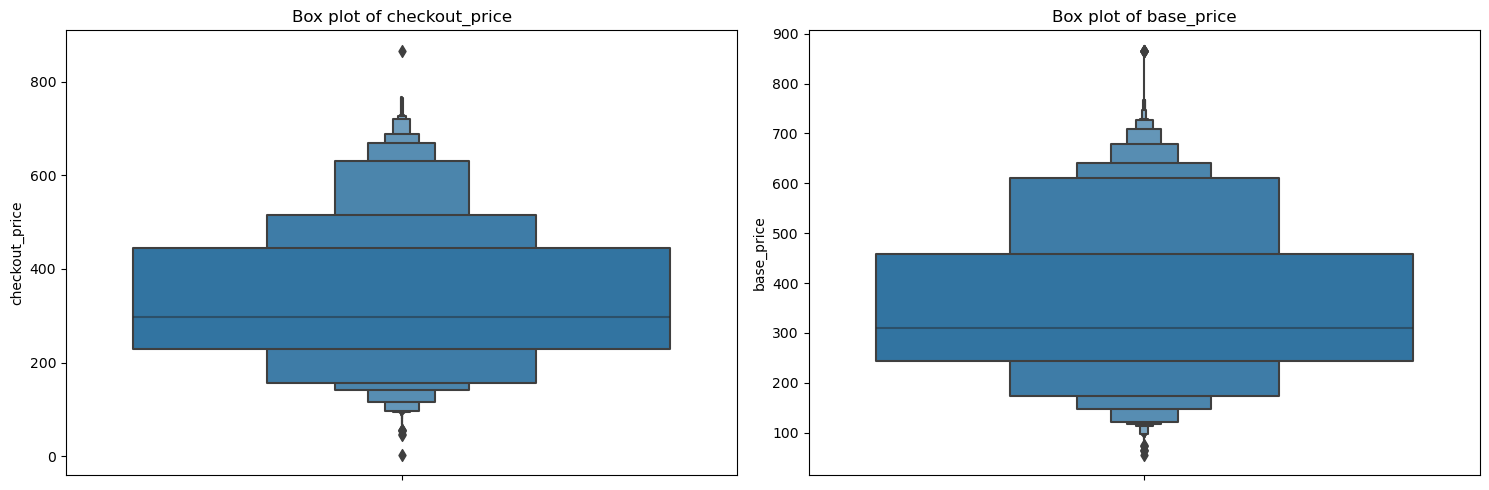

{'checkout_price': 1, 'base_price': 8}

In [18]:
# function to detect outliers using IQR
def detect_outlier_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# selecting numerical columns for outlier analysis
numerical_cols = ["checkout_price", "base_price"]

# Detect outliers in the train dataset
outliers_train = {col: detect_outlier_iqr(df_merged, col) for col in numerical_cols}

# creating box plots for these columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxenplot(y=df_merged[col])
    plt.title(f"Box plot of {col}")

plt.tight_layout()
plt.show()

# count of outliers in each column
outliers_count = {col: len(outliers_train[col]) for col in numerical_cols}
outliers_count


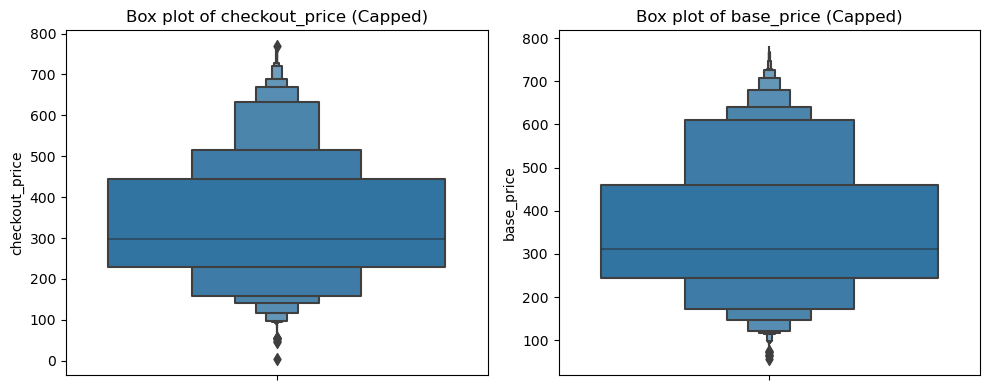

{'checkout_price': 0, 'base_price': 0}

In [19]:
# function to cap outliers using IQR
def cap_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[feature] = data[feature].clip(lower=lower_bound, upper=upper_bound)
    return data

# capping outliers in checkout_price and base_price for the dataset
df_merged = cap_outliers_iqr(df_merged, "checkout_price")
df_merged = cap_outliers_iqr(df_merged, "base_price")

# Displaying the new box plot for these columns after capping
plt.figure(figsize=(10, 4))
for i, col in enumerate(["checkout_price", "base_price"], 1):
    plt.subplot(1, 2, i)
    sns.boxenplot(y=df_merged[col])
    plt.title(f"Box plot of {col} (Capped)")

plt.tight_layout()
plt.show()

# count of outliers in each column
outliers_count = {col: len(detect_outlier_iqr(df_merged, col)) for col in numerical_cols}
outliers_count


In [20]:
# categorical Encoding 

# Identifyy categorical columns
categorical_cols = df_merged.select_dtypes(include=["object"]).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['center_type', 'category', 'cuisine'], dtype='object')


In [21]:
# apply one-hot encoding
df_encoded = pd.get_dummies(df_merged, columns=categorical_cols)


In [22]:
pd.set_option("display.max_columns",None)
df_encoded.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
# standardization in data preprocessing
from sklearn.preprocessing import StandardScaler

In [24]:
# Separate the features and the target
X = df_encoded.drop("num_orders", axis=1)
y = df_encoded["num_orders"]

# Apply StandardScaler to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the array back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [25]:
X_scaled.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,0.896845,-1.776494,-0.589577,-0.254535,-1.277692,-1.256072,-0.297187,-0.350123,0.686548,-0.034837,-1.9086,-1.165069,-0.509444,1.893182,1.603075,-0.217456,-0.261846,-0.174971,-0.151071,-0.262252,-0.25412,-0.279758,-0.280985,-0.258318,-0.280454,-0.250298,-0.168984,-0.264923,-0.539059,-0.572207,-0.607005,1.691739
1,1.502326,-1.776494,-0.589577,-0.057246,-1.277692,-1.358492,-0.297187,-0.350123,0.686548,-0.034837,-1.9086,-1.165069,-0.509444,1.893182,1.603075,-0.217456,-0.261846,-0.174971,-0.151071,-0.262252,-0.25412,-0.279758,-0.280985,-0.258318,-0.280454,-0.250298,-0.168984,-0.264923,-0.539059,-0.572207,-0.607005,1.691739
2,0.671213,-1.776494,-0.589577,0.940160,-1.290573,-1.358305,-0.297187,-0.350123,0.686548,-0.034837,-1.9086,-1.165069,-0.509444,1.893182,1.603075,-0.217456,-0.261846,-0.174971,-0.151071,-0.262252,-0.25412,-0.279758,-0.280985,-0.258318,-0.280454,-0.250298,-0.168984,-0.264923,-0.539059,-0.572207,-0.607005,1.691739
3,0.610550,-1.776494,-0.589577,0.209460,0.047478,0.518786,-0.297187,-0.350123,0.686548,-0.034837,-1.9086,-1.165069,-0.509444,1.893182,1.603075,-0.217456,-0.261846,-0.174971,-0.151071,-0.262252,-0.25412,-0.279758,-0.280985,-0.258318,-0.280454,-0.250298,-0.168984,-0.264923,-0.539059,1.747618,-0.607005,-0.591108
4,1.374349,-1.776494,-0.589577,1.108221,-0.580223,-0.694755,-0.297187,-0.350123,0.686548,-0.034837,-1.9086,-1.165069,-0.509444,1.893182,1.603075,-0.217456,-0.261846,-0.174971,-0.151071,-0.262252,-0.25412,-0.279758,-0.280985,-0.258318,-0.280454,-0.250298,-0.168984,-0.264923,-0.539059,1.747618,-0.607005,-0.591108


In [26]:
# Model Building in Demand Forecasting
# Splitting the Data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# X_scaled contains the standardized features and y contains the target variable 'num_orders'
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size=0.2, random_state=42)

In [29]:
# Model Training
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [30]:
# linear Regression 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predictions_linear = linear_model.predict(X_test)

In [31]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
predictions_rf = rf_model.predict(X_test)

In [32]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
predictions_dt = dt_model.predict(X_test)

In [33]:
# model Evaluation 
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return mse, mape, rmse

# Compute metrics for each model
mse_linear, mape_linear, rmse_linear = calculate_metrics(y_test, predictions_linear)
mse_rf, mape_rf, rmse_rf = calculate_metrics(y_test, predictions_rf)
mse_dt, mape_dt, rmse_dt = calculate_metrics(y_test, predictions_dt)

 for linear Regression

In [34]:
print("Mean Squared Error (MSE):", mse_linear)
print("Mean Absolute Percentage Error (MAPE):, mape_linear")
print("Root Mean Squared Error (RMSE):", rmse_linear)

Mean Squared Error (MSE): 88999.97645372603
Mean Absolute Percentage Error (MAPE):, mape_linear
Root Mean Squared Error (RMSE): 298.3286383398785


In [35]:
# For Random Forest Regression
print("For Random Forest Regression")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Percentage Error (MAPE):", mape_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)

For Random Forest Regression
Mean Squared Error (MSE): 21827.87957678239
Mean Absolute Percentage Error (MAPE): 0.49226960738239867
Root Mean Squared Error (RMSE): 147.7426125963068


In [36]:
# for decision tree 
print("Mean Squared Error (MSE):", mse_dt)
print("Mean Absolute Percentage Error (MAPE):", mape_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)

Mean Squared Error (MSE): 40004.54693899902
Mean Absolute Percentage Error (MAPE): 0.5965757496437954
Root Mean Squared Error (RMSE): 200.01136702447442
